# Fasting Blood Sugar Level & Maximum Heart Rate vs. Presence of Coronary Heart Disease

## Introduction

Coronary heart disease results from cholesterol accumulation in the walls of arteries (Centers for Disease Control and Prevention, 2021). Over time, this plaque buildup causes the arteries to constrict, blocking blood flow and leading to the condition. In individuals with heart disease, factors like blood sugar and heart rate have important connections to disease development. For example, high blood sugar levels can result in increased artery damage and higher plaque buildup on artery walls. Abnormal heart rate is also considered a risk factor for coronary heart disease, as it can indicate an increased need for oxygen associated with restricted arteries (LeWine, 2023). 

For this reason, we will be determining: **can fasting blood sugar, a measurement of blood sugar after fasting overnight (mg/dl), and maximum heart rate achieved during exercise (bpm) predict the presence of coronary heart disease?** This will be completed using classification with the dataset “Heart Disease” provided by the course. These variables were chosen as predictors based on previous research linking them to heart disease risk, as outlined above. Additionally, they are relatively accessible for a general population to obtain measurements and assess their own risk of heart disease based on the outcome of this analysis.  Other features included in the dataset, such as cholesterol, would likely be effective predictors as well, but we will be focusing specifically on fasting blood sugar and maximum heart rate to increase specificity and manageability of our analysis.

Within this dataset, patients’ fasting blood sugar (mg/dl) and their maximum heart rate reached during exercise (bpm) will be used as the predictors. Overall, this dataset includes patient information from research across four locations: the USA (Cleveland and Long Beach), Hungary, and Switzerland. For the purposes of our analysis, we will only be using data from Cleveland, collected from the Cleveland Clinic. 

High blood sugar can result in increased buildup on artery walls and a low maximum heart rate can indicate abnormal heart function (Park et al., 2013; Sandvik et al., 1995). For this reason, we hypothesize that individuals with a higher fasting blood sugar and lower maximum heart rate achieved during exercise will be expected to have coronary heart disease (num >= 0).  

## Methods and Results

Our first predictor is variable #16 (**fbs**) which is the patient's fasting blood sugar level. Our second predictor is variable #32 (**thalach**) which is the patient maximum heart rate achieved during exercise (bpm). We will be using the KNN Classification Model to predict and classify variable #58 (**num**) which is the diagnosis of heart disease (angiographic disease status), with those having greater than 120 mg/dl fbs and/or low maximum heart rate being more likely to have heart disease. We will also only be using USA data from the Cleveland database for our analysis. Note that for variable #58, we will be splitting the class into whether an individual does not have heart disease (num = 0) or has some heart disease (num >= 0). To visualize the data in our preliminary analysis, we will graph our results in a bar plot with maximum heart rate on the y-axis and fasting blood sugar on the x-axis, with bars organized by colour based on whether or not individuals are diagnosed with heart disease.

To start, the relevant libraries must be imported for data analysis, including tidyverse for data wrangling, repr for data visualization, and tidymodels for data modelling. The kknn package will be used for our classification. 

In [50]:
library(tidyverse) #for data wrangling
library(repr) #for data visualizing
library(tidymodels) #for modeling
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



The first round of processing involves reading in the data, and setting the column names of the dataset. We then select the three relevant columns for our analysis, "fbs"(fasting blood sugar level <= 120?), "thalach" (maximum heart rate achieved), and "num" (severity of heart disease). Then, for the specific case of the "num" column, we binarized the data by setting all values above or equal to 1 to become 1 and all values at 0 to stay at 0. This way, "num" now represents the binary variable "has heart disease?". We also changed the type of variables in the  "fbs" and "num" columns to factors because we are treating them as categorical variables for this analysis. The outcome of this processing is displayed in **Table 1**.

In [51]:
set.seed(1)
download.file("https://raw.githubusercontent.com/shellumang/dsci-100-2023w1-group-28/main/processed.cleveland%5B1%5D.data", destfile = "processed.cleveland.data")
cleveland <- read_csv("processed.cleveland.data")
colnames(cleveland) = c("age","sex","cp","trestbps", "chol","fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num") #column headers come from dataset website
cleveland$num <- ifelse(cleveland$num>0, 1, 0) #This line of code converts all values > 1 in num to just 1, in order to binarize it.
processed_cleveland <- select(cleveland, fbs, thalach, num) |> #we only care about fbs, thalach, num
                mutate(fbs = as_factor(fbs)) |> #we consider fbs as a predictor categorical variable
                mutate(num = as_factor(num)) #we consider num as a goal categorical variable
head(processed_cleveland) #data after first round of processing

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fbs,thalach,num
<fct>,<dbl>,<fct>
0,108,1
0,129,1
0,187,0
0,172,0
0,178,0
0,160,1


**Table 1**. The first six rows of the processed Cleveland dataset showing the three columns "fbs", "thalach" and "num" which will be used for data analysis.

The next step subsets the dataset into training and testing datasets. We used the common split of 75% to 25% training data : testing data. We can see from the head() of both that the data has indeed been split and both testing and training contain different data. The training data is shown in **Table 2** and the testing data is shown in **Table 3**.

In [52]:
set.seed(1)
split_cleveland <- initial_split(processed_cleveland, prop = 0.75, strata = num) #this step is splitting the data into 75% training, 25% test
trainingdata <- training(split_cleveland) 
head(trainingdata) #training data

fbs,thalach,num
<fct>,<dbl>,<fct>
0,187,0
0,172,0
0,178,0
0,153,0
0,173,0
0,160,0


**Table 2**. The training dataset split from the processed Cleveland data in **Table 1**.

In [53]:
set.seed(1)
testingdata <- testing(split_cleveland)
head(testingdata) #testing data

fbs,thalach,num
<fct>,<dbl>,<fct>
0,160,1
0,163,0
0,148,0
1,162,0
0,174,0
0,139,0


**Table 3.** The testing dataset split from the processed Cleveland data in **Table 1**.

As our testing and training datasets have now been separated, we can create a visualization of our training data for exploratory data analysis.  To do this, we use ggplot to create a bar plot with our two predictor variables on the axes, coloured by the binary presence of heart disease. The result, shown in **Figure 1** illustrates the relationship between our predictor variables and heart disease, where individuals with heart disease tend to have a lower maximum heart rate during exercise across a range of fasting blood sugar levels.

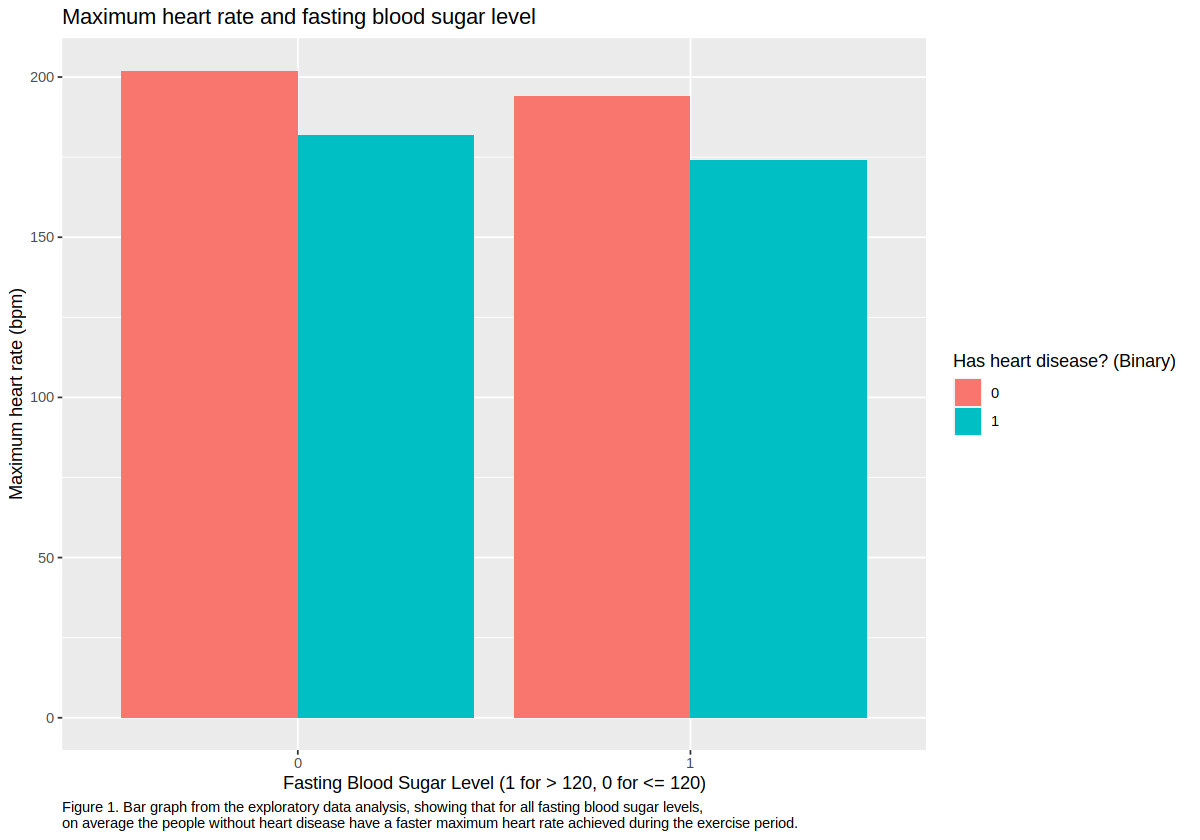

In [54]:
options(repr.plot.width = 10, repr.plot.height = 7) #for visualizing only

plot <- ggplot(trainingdata, aes(x = fbs, y = thalach, fill = num)) + 
geom_bar(position = "dodge", stat = "identity") + 
labs(x = "Fasting Blood Sugar Level (1 for > 120, 0 for <= 120)", y = "Maximum heart rate (bpm)", fill = "Has heart disease? (Binary)", 
     caption = "Figure 1. Bar graph from the exploratory data analysis, showing that for all fasting blood sugar levels, 
on average the people without heart disease have a faster maximum heart rate achieved during the exercise period.") +
theme(plot.caption = element_text(hjust=0))+
ggtitle("Maximum heart rate and fasting blood sugar level")
plot

Returning to our classification process, we then perform cross-validation on the training data set to select which k is the most optimal for our data set for k-nn classification. We created a recipe to predict "num" with the other variables, then set the "neighbors" argument in nearest_neighbor() to tune(). After collecting metrics, this produces **Table 4** below, which displays the accuracy per number of neighbours.

In [55]:
set.seed(1)

recipe <- recipe(num ~ thalach + fbs, data = trainingdata)

vfold <- vfold_cv(trainingdata, v = 5, strata = num)

tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

values <- tibble(neighbors = seq(2,14,1))

knn_results <- workflow() |>
      add_recipe(recipe) |>
      add_model(tune) |>
      tune_grid(resamples = vfold, grid = values) |>
      collect_metrics() |>
      filter(.metric == "accuracy")
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.5754765,5,0.02629244,Preprocessor1_Model01
3,accuracy,binary,0.6508520,5,0.03080019,Preprocessor1_Model02
4,accuracy,binary,0.6420641,5,0.03070080,Preprocessor1_Model03
5,accuracy,binary,0.6684365,5,0.02838320,Preprocessor1_Model04
6,accuracy,binary,0.6639921,5,0.01740896,Preprocessor1_Model05
7,accuracy,binary,0.6731840,5,0.02433335,Preprocessor1_Model06
8,accuracy,binary,0.6863241,5,0.02050726,Preprocessor1_Model07
9,accuracy,binary,0.7081599,5,0.01496049,Preprocessor1_Model08
10,accuracy,binary,0.6863285,5,0.01956814,Preprocessor1_Model09


**Table 4**. Table of the accuracy of prediction per number of neighbours or K. This table is created to determine the accuracy of predicting "num" with other variables, "thalach" and "fbs", using different values of K. This will be used to create **Figure 2** below.

We will now graph the table above showing accuracy per number of neighbours to choose our value of K that gives us the optimal accuracy for our classification. This is completed using ggplot to create a line graph, where points show the accuracy estimate for each K value, shown in **Figure 2**.

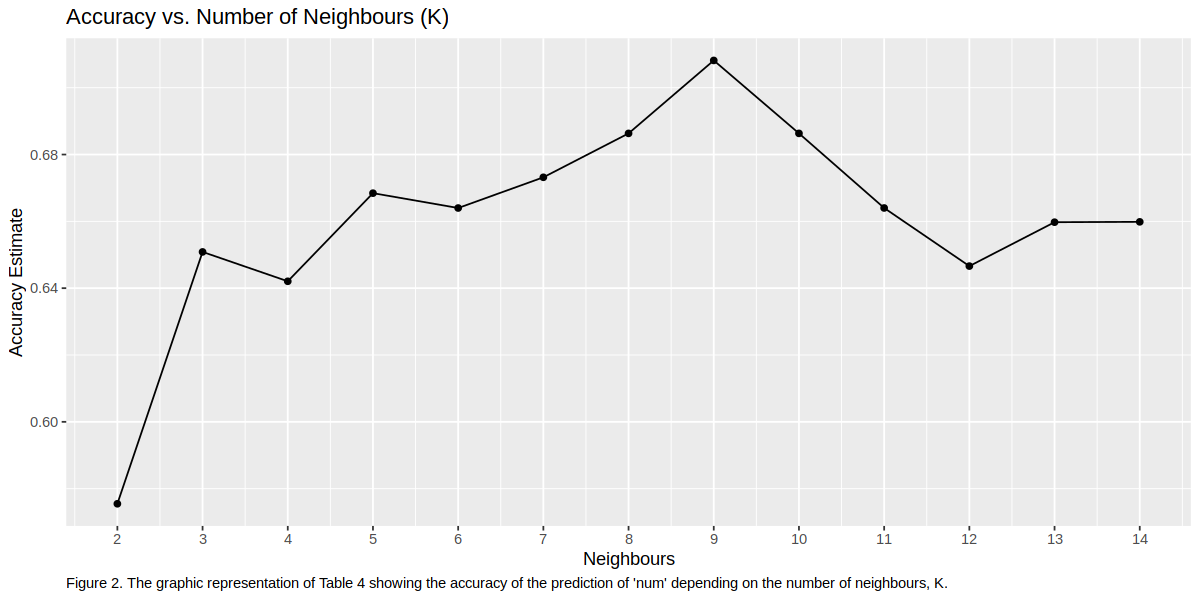

In [72]:
options(repr.plot.width = 10, repr.plot.height = 5) #for visualizing only
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      xlab("Neighbours") + 
      ylab("Accuracy Estimate") + 
      labs(caption = "Figure 2. The graphic representation of Table 4 showing the accuracy of the prediction of 'num' depending on the number of neighbours, K.") +
scale_x_continuous(breaks = 1:14) +
theme(plot.caption = element_text(hjust=0))+
ggtitle("Accuracy vs. Number of Neighbours (K)")
accuracy_versus_k

We can see that the most accurate predictions come from using K = 7, so we can now build our final model:

In [69]:
set.seed(1)

best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
      set_engine("kknn") |>
      set_mode("classification")

heart_fit <- workflow() |>
      add_recipe(recipe) |>
      add_model(best_spec) |>
      fit(data = trainingdata)

We can now use our final model built from the training data to predict on the testing dataset. The outcome of our prediction is displayed in **Table 5**, which shows the accuracy and Cohen's Kappa value for our classification model. 

In [70]:
set.seed(1)

heart_predictions <- heart_fit |>
predict(testingdata) |>
bind_cols(testingdata)

heart_metrics <- heart_predictions |>
        metrics(truth = num, estimate = .pred_class)

heart_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6578947
kap,binary,0.2997874


**Table 5**. Table showing the accuracy of the prediction of "num". The model performance, or the accuracy of the binary classification model, is approximately 65.79%. The Cohen's Kappa value is 0.2998, between the possible [-1, +1] values.

We then further analyze the prediction accuracy of our model by producing a confusion matrix, shown in **Table 6**. The confusion matrix shows which areas of classification the model is stronger or weaker in, including true positives and negatives and false positives and negatives predicted by the model.

In [71]:
heart_conf_mat <- heart_predictions |>
conf_mat(truth = num, estimate = .pred_class)    

heart_conf_mat

          Truth
Prediction  0  1
         0 32 17
         1  9 18

**Table 6**. The confusion matrix presented in a 2x2 format, where the columns represent the actual classes, and the rows represent the predicted classes.

The confusion matrix shows the true positives and negatives and the false positives and negatives.    
True Positives (TP): 18 instances were correctly predicted as class 1.   
True Negatives (TN): 32 instances were correctly predicted as class 0.   
False Positives (FP): 17 instances were incorrectly predicted as class 1.   
False Negatives (FN): 9 instances were incorrectly predicted as class 0.

## Discussion

Our initial bar plot to visualize the data (**Figure 1**) demonstrated that individuals without heart disease tend to have a higher maximum heart rate achieved during exercise, in both fasting blood sugar level conditions. This was consistent with our hypothesis that individuals with a lower maximum heart rate achieved during exercise would be more likely to have heart disease due to the previously determined association between high blood sugar and abnormal heart functioning (Park et al., 2013; Sandvik et al., 1995). Our results after data analysis and classification provided further insight into the relationship between our predictor variables and our response variable.  
  
The accuracy of the binary classification model is approximately 65.79% as seen in **Table 5**, which means that the predictions made by the model were correct 65.79% of the time. The model has a reasonable accuracy, but it seems to have some difficulty correctly predicting instances of class 1, as indicated by the higher number of false positives than false negatives in the confusion matrix (**Table 6**). This means that the model will predict individuals as having heart disease even when they do not in reality, more often than it will miss a true presence of heart disease. In terms of medical predictions, false alarms are safer than misses regarding the presence of a condition (can then complete further testing to confirm whether a condition is really present or not), but this is an area for possible improvement in future classification models.

Before conducting our data analysis, we were expecting maximum heart rate and fasting blood sugar to have a higher accuracy in predicting the presence of heart disease. Given the prior research supporting correlations between blood sugar and heart disease, and between heart rate and heart disease, we expected both of these predictor variables to have higher accuracy in our classification model to determine the presence of heart disease. Though our results do show a reasonable value for prediction accuracy, we did originally expect our two predictor variables to have greater accuracy in predicting heart disease.   

Although our results only showed an accuracy of 65.79%, these findings could theoretically help people who have abnormally high fasting blood sugar or low maximum heart rates to understand the risks associated with these conditions. Based on an individual’s fasting blood sugar level and/or maximum heart rate, this model could be used to determine which individuals are at risk for heart disease. This could then encourage them to make lifestyle changes in order to decrease their chances of developing heart disease. Given the results from our classification model, it is important to note that any predictions made based off of these two predictor variables alone can only be accurate 65.79% of the time, with a relatively high false positive rate. This should be taken into consideration when considering the potential implications of our findings.   

The outcome of this analysis gives rise to subsequent questions building off of our classification. For example, determining how fasting blood sugar can be lowered through monitoring of the timing of food consumption and types of food eaten. Another question might be about how to increase low maximum heart rates through creating exercise plans or implementing diet changes. Furthermore, one could determine how results for the prediction of heart disease might differ in other countries, based on cultural differences in diet and food ingredients. Finally, it would also be pertinent to identify other predictor variables that could potentially predict heart disease with a higher accuracy rate, allowing for more confident predictions of heart disease risk in a population.


## References

Centers for Disease Control and Prevention. (2022, June 20). Diabetes and your heart. Centers for Disease Control and Prevention. https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html#:~:text=Over%20time%2C%20high%20blood%20sugar,and%20can%20damage%20artery%20walls   

Coronary artery disease. Centers for Disease Control and Prevention. (2021, July 19). https://www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=Coronary%20artery%20disease%20is%20caused,This%20process%20is%20called%20atherosclerosis

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9

Diabetes tests. Centers for Disease Control and Prevention. (2023, February 28). https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=Fasting%20Blood%20Sugar%20Test,higher%20indicates%20you%20have%20diabetes

LeWine, H. E. (Ed.). (2023, June 13). What your heart rate is telling you. Harvard Health. https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you#:~:text=It%20speeds%20up%20and%20slows,disease%20or%20other%20medical%20condition 

Park, C., Guallar, E., Linton, J. A., Lee, D.-C., Jang, Y., Son, D. K., Han, E.-J., Baek, S. J., Yun, Y. D., Jee, S. H., & Samet, J. M. (2013). Fasting glucose level and the risk of incident atherosclerotic cardiovascular diseases. Diabetes Care, 36(7), 1988–1993. https://doi.org/10.2337/dc12-1577

Sandvik, L., Erikssen, J., Ellestad, M., Erikssen, G., Thaulow, E., Mundal, R., & Rodahl, K. (1995). Heart rate increase and maximal heart rate during exercise as predictors of cardiovascular mortality. Coronary Artery Disease, 6(8), 667–679. https://doi.org/10.1097/00019501-199508000-00012